In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [14]:
def read_log(logfile):
    runtimes = []

    with open(logfile, "r") as f:
        for line in f:
            runtime = float(line.split(",")[-1])
            runtimes.append(runtime)

    return runtimes

In [17]:
runtimes_K10_N100000 = read_log("../logs/timeTest/K_10_NUM_OF_POINTS_100000.log")
runtimes_K20_N100000 = read_log("../logs/timeTest/K_20_NUM_OF_POINTS_100000.log")
runtimes_K30_N100000 = read_log("../logs/timeTest/K_30_NUM_OF_POINTS_100000.log")

In [43]:
def conv1d_mean(ts, window_size=5):
    p = window_size//2
    ts_padded = np.zeros(len(ts) + 2*p)
    ts_padded[p:-p] = ts
    ts_padded[:p] = ts[0]
    ts_padded[-p:] = ts[-1]

    times = np.arange(len(ts))
    mean_list = list(map(lambda t: ts_padded[t:t+window_size].mean(), times))
    mean_list = np.array(mean_list)
    return mean_list

In [48]:
avglines_K10_N100000 = conv1d_mean(runtimes_K10_N100000, 15)
avglines_K20_N100000 = conv1d_mean(runtimes_K20_N100000, 15)
avglines_K30_N100000 = conv1d_mean(runtimes_K30_N100000, 15)

In [75]:
plt.rcParams.update({'font.size': 14, "font.family": "Times New Roman"})

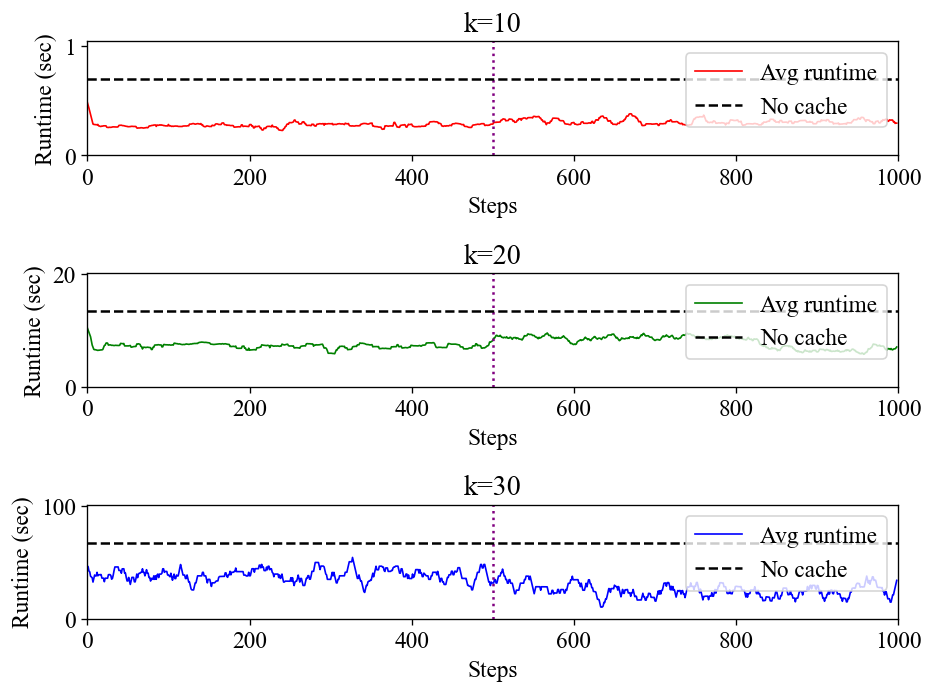

In [80]:
plt.figure(figsize=(8, 6), dpi=120)

plt.subplot(3, 1, 1)
# sns.lineplot(runtimes_K10_N100000[1:], c="orange", linewidth=0.5, label="Runtime")
sns.lineplot(avglines_K10_N100000[1:], c="red", linewidth=1, label="cache")
plt.vlines([500], ymin=0, ymax=runtimes_K10_N100000[0]*1.5, colors=["purple"], linestyles=["dotted"])
plt.hlines([runtimes_K10_N100000[0]], xmin=[0], xmax=[1000], colors=["black"], linestyles=["dashed"], label="No cache")
plt.xlim([0, 1000])
plt.ylim([0, runtimes_K10_N100000[0]*1.5])
plt.legend(loc="upper right")
plt.title("k=10")
plt.ylabel("Runtime (sec)")
plt.xlabel("Steps")
plt.subplot(3, 1, 2)
# sns.lineplot(runtimes_K20_N100000[1:], c="lime", linewidth=0.5, label="Runtime")
sns.lineplot(avglines_K20_N100000[1:], c="green", linewidth=1, label="cache")
plt.vlines([500], ymin=0, ymax=runtimes_K20_N100000[0]*1.5, colors=["purple"], linestyles=["dotted"])
plt.hlines([runtimes_K20_N100000[0]], xmin=[0], xmax=[1000], colors=["black"], linestyles=["dashed"], label="No cache")
plt.xlim([0, 1000])
plt.ylim([0, runtimes_K20_N100000[0]*1.5])
plt.legend(loc="upper right")
plt.title("k=20")
plt.ylabel("Runtime (sec)")
plt.xlabel("Steps")
plt.subplot(3, 1, 3)
# sns.lineplot(runtimes_K30_N100000[1:], c="cornflowerblue", linewidth=0.5, label="Runtime")
sns.lineplot(avglines_K30_N100000[1:], c="blue", linewidth=1, label="cache")
plt.vlines([500], ymin=0, ymax=runtimes_K30_N100000[0]*1.5, colors=["purple"], linestyles=["dotted"])
plt.hlines([runtimes_K30_N100000[0]], xmin=[0], xmax=[1000], colors=["black"], linestyles=["dashed"], label="No cache")
plt.xlim([0, 1000])
plt.ylim([0, runtimes_K30_N100000[0]*1.5])
plt.legend(loc="upper right")
plt.title("k=30")
plt.ylabel("Runtime (sec)")
plt.xlabel("Steps")

plt.tight_layout()
plt.savefig("time_test_artificial.png")
plt.show()

In [115]:
runtimes_K10_N100000 = read_log("../logs/timeTest/K_10_NUM_OF_POINTS_50000.log")
runtimes_K20_N100000 = read_log("../logs/timeTest/K_20_NUM_OF_POINTS_50000.log")
runtimes_K30_N100000 = read_log("../logs/timeTest/K_30_NUM_OF_POINTS_50000.log")

In [116]:
def conv1d_mean(ts, window_size=5):
    p = window_size//2
    ts_padded = np.zeros(len(ts) + 2*p)
    ts_padded[p:-p] = ts
    ts_padded[:p] = ts[0]
    ts_padded[-p:] = ts[-1]

    times = np.arange(len(ts))
    mean_list = list(map(lambda t: ts_padded[t:t+window_size].mean(), times))
    mean_list = np.array(mean_list)
    return mean_list

In [117]:
plt.rcParams.update({'font.size': 14, "font.family": "Times New Roman"})

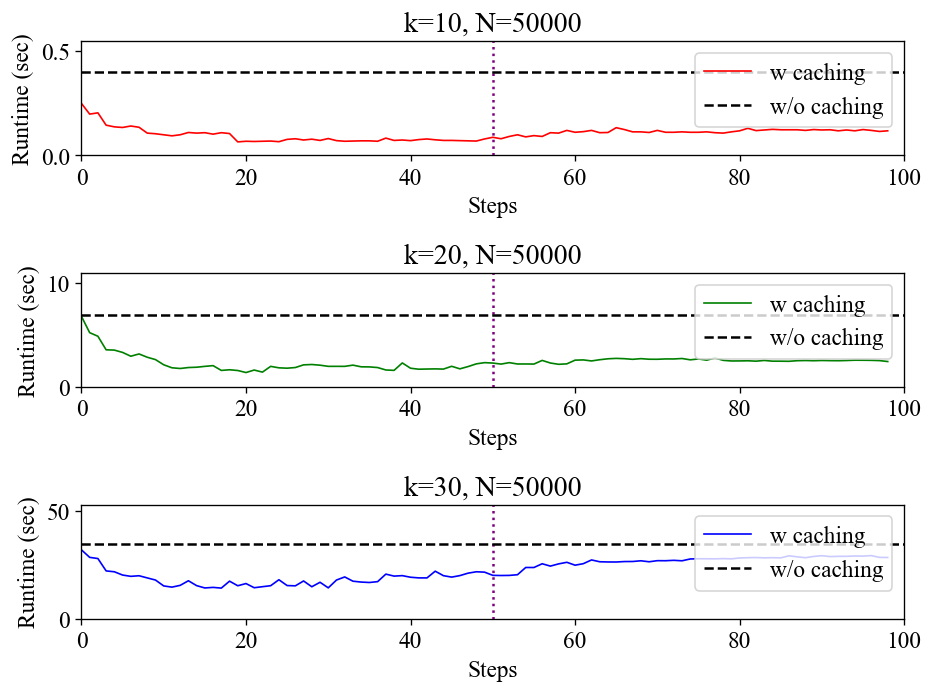

In [123]:
plt.figure(figsize=(8, 6), dpi=120)

plt.subplot(3, 1, 1)
sns.lineplot(runtimes_K10_N100000[1:], c="red", linewidth=1, label="w caching")
plt.vlines([50], ymin=0, ymax=runtimes_K10_N100000[0]*1.5, colors=["purple"], linestyles=["dotted"])
plt.hlines([0.3994], xmin=[0], xmax=[100], colors=["black"], linestyles=["dashed"], label="w/o caching")
plt.xlim([0, 100])
plt.ylim([0, runtimes_K10_N100000[0]*1.5])
plt.legend(loc="upper right")
plt.title("k=10, N=50000")
plt.ylabel("Runtime (sec)")
plt.xlabel("Steps")
plt.subplot(3, 1, 2)
sns.lineplot(runtimes_K20_N100000[1:], c="green", linewidth=1, label="w caching")
plt.vlines([50], ymin=0, ymax=runtimes_K20_N100000[0]*1.5, colors=["purple"], linestyles=["dotted"])
plt.hlines([6.8742], xmin=[0], xmax=[100], colors=["black"], linestyles=["dashed"], label="w/o caching")
plt.xlim([0, 100])
plt.ylim([0, runtimes_K20_N100000[0]*1.5])
plt.legend(loc="upper right")
plt.title("k=20, N=50000")
plt.ylabel("Runtime (sec)")
plt.xlabel("Steps")
plt.subplot(3, 1, 3)

sns.lineplot(runtimes_K30_N100000[1:], c="blue", linewidth=1, label="w caching")
plt.vlines([50], ymin=0, ymax=runtimes_K30_N100000[0]*1.5, colors=["purple"], linestyles=["dotted"])
plt.hlines([34.3882], xmin=[0], xmax=[100], colors=["black"], linestyles=["dashed"], label="w/o caching")
plt.xlim([0, 100])
plt.ylim([0, runtimes_K30_N100000[0]*1.5])
plt.legend(loc="upper right")
plt.title("k=30, N=50000")
plt.ylabel("Runtime (sec)")
plt.xlabel("Steps")

plt.tight_layout()
plt.savefig("time_test_artificial.png")
plt.show()